<a href="https://colab.research.google.com/github/Gary-713/Weight-and-Biases/blob/main/Weight_and_biases_Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report


In [6]:
pip install wandb

In [7]:
import wandb

In [8]:
wandb.login()

<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [9]:
# Initialize WandB
run = wandb.init(
    project="Phishing-Site",
    # Track hyperparameters and run metadata
    config={
        "learning_rate": 0.01,
        "epochs": 10,
    },
)

wandb: Currently logged in as: mbungogary713 (mbungogary713-usiu). Use `wandb login --relogin` to force relogin


In [10]:
data = pd.read_csv('/content/urlset.csv', encoding='latin1', on_bad_lines='skip')

<ipython-input-10-4d08721b94b7>:1: DtypeWarning: Columns (1,2,3,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/urlset.csv', encoding='latin1', on_bad_lines='skip')


In [11]:
data

,domain,ranking,mld_res,mld.ps_res,card_rem,ratio_Rrem,ratio_Arem,jaccard_RR,jaccard_RA,jaccard_AR,jaccard_AA,jaccard_ARrd,jaccard_ARrem,label
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,10000000,1.0,0.0,18.0,107.611111,107.277778,0.000000,0.000000,0.000000,0.000000,0.8,0.795729,1.0
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,10000000,0.0,0.0,11.0,150.636364,152.272727,0.000000,0.000000,0.000000,0.000000,0,0.768577,1.0
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,10000000,0.0,0.0,14.0,73.500000,72.642857,0.000000,0.000000,0.000000,0.000000,0,0.726582,1.0
3,mail.printakid.com/www.online.americanexpress....,10000000,0.0,0.0,6.0,562.000000,590.666667,0.000000,0.000000,0.000000,0.000000,0,0.85964,1.0
4,thewhiskeydregs.com/wp-content/themes/widescre...,10000000,0.0,0.0,8.0,29.000000,24.125000,0.000000,0.000000,0.000000,0.000000,0,0.748971,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96000,xbox360.ign.com/objects/850/850402.html,339,1.0,1.0,2.0,142.500000,141.000000,0.009009,0.009091,0.006536,0.006601,0.45098,0.846906,0.0
96001,games.teamxbox.com/xbox-360/1860/Dead-Space/,63029,1.0,0.0,3.0,114.000000,128.333333,0.002899,0.002577,0.002907,0.002584,0.75,0.714623,0.0
96002,www.gamespot.com/xbox360/action/deadspace/,753,1.0,1.0,3.0,91.000000,101.333333,0.000000,0.003106,0.000000,0.000000,0.111111,0.648571,0.0
96003,en.wikipedia.org/wiki/Dead_Space_(video_game),6,1.0,1.0,4.0,682.000000,744.250000,0.033075,0.029412,0.030250,0.029145,0.809735,0.840323,0.0


In [12]:
# Handle missing values
data.dropna(inplace=True)

In [13]:
crosstab = pd.crosstab([data['mld_res'],data['mld.ps_res'],data['card_rem'],data['ratio_Rrem'],data['ratio_Arem'],data['jaccard_RR'],data['jaccard_RA'],data['jaccard_AR'],data['jaccard_AA'],data['jaccard_ARrd'],data['jaccard_ARrem']],data['label'])
print(crosstab)

label                                                                                                                     0.0  \
mld_res mld.ps_res card_rem ratio_Rrem ratio_Arem jaccard_RR jaccard_RA jaccard_AR jaccard_AA jaccard_ARrd jaccard_ARrem        
0.0     0.0        0.0      0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   0.0          0.0             41   
                   1.0      0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   0.0          0.0            160   
                            1.000000   0.000000   0.000000   0.000000   0.000000   0.000000   0.0          0.0              2   
                            2.000000   0.000000   0.000000   0.000000   0.000000   0.000000   0.0          0.0              2   
                                       1.000000   0.000000   0.000000   0.000000   0.000000   0.0          0.0             12   
...                                                                                              

In [14]:
y = data['label']

In [15]:
y

0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
96000    0.0
96001    0.0
96002    0.0
96003    0.0
96004    0.0
Name: label, Length: 95913, dtype: float64

In [37]:
y = y[:-1]

In [16]:
X = data.drop(['domain', 'label'], axis=1)

In [18]:
X

,ranking,mld_res,mld.ps_res,card_rem,ratio_Rrem,ratio_Arem,jaccard_RR,jaccard_RA,jaccard_AR,jaccard_AA,jaccard_ARrd,jaccard_ARrem
0,10000000,1.0,0.0,18.0,107.611111,107.277778,0.000000,0.000000,0.000000,0.000000,0.8,0.795729
1,10000000,0.0,0.0,11.0,150.636364,152.272727,0.000000,0.000000,0.000000,0.000000,0,0.768577
2,10000000,0.0,0.0,14.0,73.500000,72.642857,0.000000,0.000000,0.000000,0.000000,0,0.726582
3,10000000,0.0,0.0,6.0,562.000000,590.666667,0.000000,0.000000,0.000000,0.000000,0,0.85964
4,10000000,0.0,0.0,8.0,29.000000,24.125000,0.000000,0.000000,0.000000,0.000000,0,0.748971
...,...,...,...,...,...,...,...,...,...,...,...,...
96000,339,1.0,1.0,2.0,142.500000,141.000000,0.009009,0.009091,0.006536,0.006601,0.45098,0.846906
96001,63029,1.0,0.0,3.0,114.000000,128.333333,0.002899,0.002577,0.002907,0.002584,0.75,0.714623
96002,753,1.0,1.0,3.0,91.000000,101.333333,0.000000,0.003106,0.000000,0.000000,0.111111,0.648571
96003,6,1.0,1.0,4.0,682.000000,744.250000,0.033075,0.029412,0.030250,0.029145,0.809735,0.840323


In [32]:
from sklearn import tree

In [33]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [34]:
clf

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [35]:
X = X.apply(pd.to_numeric, errors='coerce').dropna()

In [38]:
clf = clf.fit(X,y)

In [39]:
import pydotplus

In [40]:
from IPython.display import Image

In [41]:
dot_data=tree.export_graphviz(clf, feature_names=X.columns,
                              class_names=['1', '0'],
                              filled=True, out_file=None)

In [42]:
dot_data

'digraph Tree {\nnode [shape=box, style="filled", color="black", fontname="helvetica"] ;\nedge [fontname="helvetica"] ;\n0 [label="ranking <= 5499815.0\\nentropy = 1.0\\nsamples = 95912\\nvalue = [48008, 47904]\\nclass = 1", fillcolor="#ffffff"] ;\n1 [label="card_rem <= 9.5\\nentropy = 0.727\\nsamples = 39847\\nvalue = [31766, 8081]\\nclass = 1", fillcolor="#eca16b"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="ratio_Rrem <= 0.25\\nentropy = 0.626\\nsamples = 37467\\nvalue = [31600, 5867]\\nclass = 1", fillcolor="#ea985e"] ;\n1 -> 2 ;\n3 [label="entropy = 0.895\\nsamples = 2322\\nvalue = [723, 1599]\\nclass = 0", fillcolor="#93c9f1"] ;\n2 -> 3 ;\n4 [label="entropy = 0.533\\nsamples = 35145\\nvalue = [30877, 4268]\\nclass = 1", fillcolor="#e99254"] ;\n2 -> 4 ;\n5 [label="card_rem <= 13.5\\nentropy = 0.365\\nsamples = 2380\\nvalue = [166, 2214]\\nclass = 0", fillcolor="#48a4e7"] ;\n1 -> 5 ;\n6 [label="entropy = 0.773\\nsamples = 696\\nvalue = [158, 538]\\nc

In [43]:
graph = pydotplus.graph_from_dot_data(dot_data)

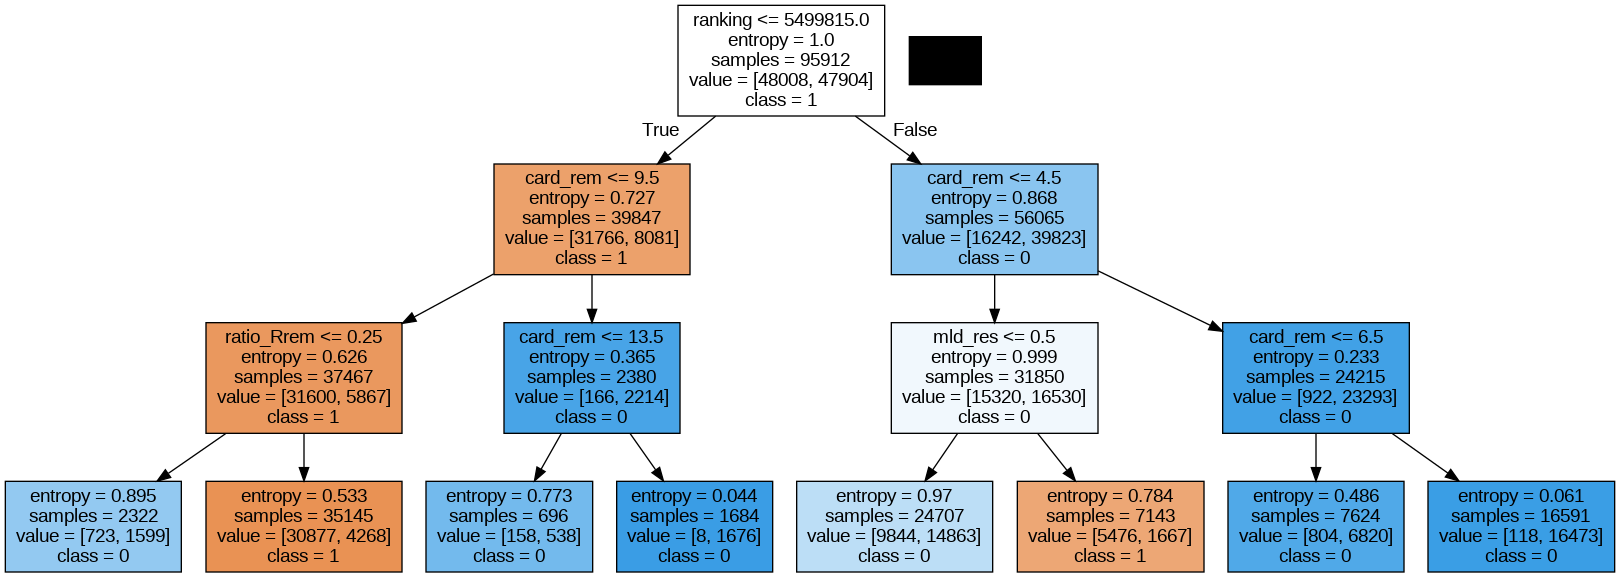

In [44]:
graph
Image(graph.create_png())

In [47]:
testdata = [
    ['https://www.gamestop.com/video-games/playstation-5/games/spider-man-miles-morales/11098136.html', 11812, 1, 1, 3, 114, 128.333333, 0.019718, 0.020151, 0.011461, 0.012788, 0.55, 0.714623, 1],
    ['https://www.ign.com/articles/2023/06/27/horizon-forbidden-west-release-date-delayed-to-2022', 339, 1, 1, 2, 142.5, 141, 0.009009, 0.009091, 0.006536, 0.006601, 0.45098, 0.846906, 0],
    ['https://www.metacritic.com/game/playstation-5/returnal', 63029, 1, 0, 3, 114, 128.333333, 0.002899, 0.002577, 0.002907, 0.002584, 0.75, 0.714623, 0],
    ['https://www.rockstargames.com/reddeadredemption2/', 753, 1, 1, 3, 91, 101.333333, 0, 0.003106, 0, 0, 0.111111, 0.648571, 0],
    ['https://www.netflix.com/title/80025678', 6, 1, 1, 4, 682, 744.25, 0.033075, 0.029412, 0.03025, 0.029145, 0.809735, 0.840323, 0],
    ['https://www.nytimes.com/2023/08/01/technology/fortnite-apple-lawsuit.html', 2547, 1, 1, 5, 32.4, 27.2, 0.022222, 0.03268, 0.017341, 0.020408, 0.636364, 0.674157, 0],
]


In [48]:
testdata

[['https://www.gamestop.com/video-games/playstation-5/games/spider-man-miles-morales/11098136.html',
  11812,
  1,
  1,
  3,
  114,
  128.333333,
  0.019718,
  0.020151,
  0.011461,
  0.012788,
  0.55,
  0.714623,
  1],
 ['https://www.ign.com/articles/2023/06/27/horizon-forbidden-west-release-date-delayed-to-2022',
  339,
  1,
  1,
  2,
  142.5,
  141,
  0.009009,
  0.009091,
  0.006536,
  0.006601,
  0.45098,
  0.846906,
  0],
 ['https://www.metacritic.com/game/playstation-5/returnal',
  63029,
  1,
  0,
  3,
  114,
  128.333333,
  0.002899,
  0.002577,
  0.002907,
  0.002584,
  0.75,
  0.714623,
  0],
 ['https://www.rockstargames.com/reddeadredemption2/',
  753,
  1,
  1,
  3,
  91,
  101.333333,
  0,
  0.003106,
  0,
  0,
  0.111111,
  0.648571,
  0],
 ['https://www.netflix.com/title/80025678',
  6,
  1,
  1,
  4,
  682,
  744.25,
  0.033075,
  0.029412,
  0.03025,
  0.029145,
  0.809735,
  0.840323,
  0],
 ['https://www.nytimes.com/2023/08/01/technology/fortnite-apple-lawsuit.html'

In [49]:
data.columns

Index(['domain', 'ranking', 'mld_res', 'mld.ps_res', 'card_rem', 'ratio_Rrem',
       'ratio_Arem', 'jaccard_RR', 'jaccard_RA', 'jaccard_AR', 'jaccard_AA',
       'jaccard_ARrd', 'jaccard_ARrem', 'label'],
      dtype='object')

In [51]:
testdata = pd.DataFrame(testdata, columns=data.columns)

In [53]:
testY = testdata['label']

In [54]:
testY

0    1
1    0
2    0
3    0
4    0
5    0
Name: label, dtype: int64

In [55]:
testX = testdata.drop(['domain', 'label'], axis=1)

In [56]:
testX

,ranking,mld_res,mld.ps_res,card_rem,ratio_Rrem,ratio_Arem,jaccard_RR,jaccard_RA,jaccard_AR,jaccard_AA,jaccard_ARrd,jaccard_ARrem
0,11812,1,1,3,114.0,128.333333,0.019718,0.020151,0.011461,0.012788,0.550000,0.714623
1,339,1,1,2,142.5,141.000000,0.009009,0.009091,0.006536,0.006601,0.450980,0.846906
2,63029,1,0,3,114.0,128.333333,0.002899,0.002577,0.002907,0.002584,0.750000,0.714623
3,753,1,1,3,91.0,101.333333,0.000000,0.003106,0.000000,0.000000,0.111111,0.648571
4,6,1,1,4,682.0,744.250000,0.033075,0.029412,0.030250,0.029145,0.809735,0.840323
5,2547,1,1,5,32.4,27.200000,0.022222,0.032680,0.017341,0.020408,0.636364,0.674157


In [57]:
predY = clf.predict(testX)

In [58]:
predY

array([0., 0., 0., 0., 0., 0.])

In [59]:
testY

0    1
1    0
2    0
3    0
4    0
5    0
Name: label, dtype: int64

In [62]:
predictions = pd.concat([testdata['domain'], testdata['label'], pd.Series(predY, name="Predicted")], axis=1)

In [63]:
predictions

,domain,label,Predicted
0,https://www.gamestop.com/video-games/playstati...,1,0.0
1,https://www.ign.com/articles/2023/06/27/horizo...,0,0.0
2,https://www.metacritic.com/game/playstation-5/...,0,0.0
3,https://www.rockstargames.com/reddeadredemption2/,0,0.0
4,https://www.netflix.com/title/80025678,0,0.0
5,https://www.nytimes.com/2023/08/01/technology/...,0,0.0


In [65]:
accuracy_score(testY, predY)

0.8333333333333334

In [66]:
print("Accuracy on test data is %.2f" % (accuracy_score(testY, predY)*100))

Accuracy on test data is 83.33


In [68]:
classification_report=classification_report(testY, predY)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [69]:
print(f"Decision Tree Classification Report:\n{classification_report}")

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       0.00      0.00      0.00         1

    accuracy                           0.83         6
   macro avg       0.42      0.50      0.45         6
weighted avg       0.69      0.83      0.76         6



In [70]:
# Log metrics to WandB
wandb.log({
    "Decision Tree Accuracy": accuracy_score(testY, predY)*100,
    "Decision Tree Classification Report": classification_report
})